In [34]:
using FluidDynTools
using ViscousFlow
using Plots

In [35]:
Δx = 0.02
xlim = (-2,2)
ylim = (-2,2)
g = PhysicalGrid(xlim,ylim,Δx)
cache = SurfaceVectorCache(g);

In [36]:
Ω = 1
a = 1
f(x,y) = sqrt(x^2+y^2)<=a ? 2*Ω : 0
field = SpatialField(f);

In [37]:
ω = zeros_gridcurl(cache);
evaluate_field!(ω,field,cache);

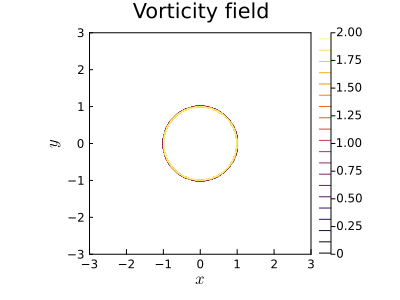

In [38]:
plot(ω,cache,xlim=(-3,3),ylim=(-3,3),levels=range(0.01,5,length=50),xlabel=L"x",ylabel=L"y",title="Vorticity field",colorbar=:true)

In [39]:
ψ = -ω;

In [40]:
inverse_laplacian!(ψ,cache);

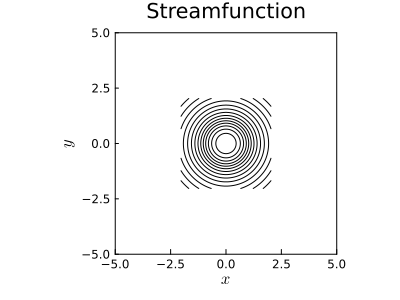

In [41]:
plot(ψ,cache,color=:Black,xlim=(-5,5),ylim=(-5,5),xlabel=L"x",ylabel=L"y",title="Streamfunction")

In [42]:
vel = zeros_grid(cache)
curl!(vel,ψ,cache);

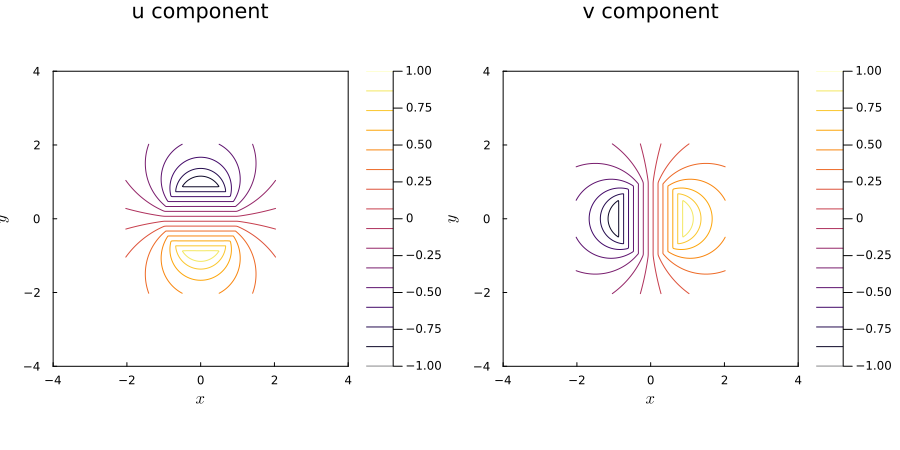

In [43]:
plot(
    plot(vel.u,cache,xlim=(-4,4),ylim=(-4,4),xlabel=L"x",ylabel=L"y",title="u component",colorbar=:true),
    plot(vel.v,cache,xlim=(-4,4),ylim=(-4,4),xlabel=L"x",ylabel=L"y",title="v component",colorbar=:true),
    size=(900,450))